<div class="alert alert-info">
    <h1>Принятие решений в бизнесе на основе данных</h1>
</div>

### Описание проекта
### Контекст
Мы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

<div class="alert alert-info">
    <h2><a name="0.0"></a> Оглавление</h2>
</div>

* [0. Описание данных и задачи](#0.)
* [1. Загрузка данных и подготовка их к анализу](#1.)
* [2. Часть 1. Приоритизация гипотез](#2.)
    - [2.1. Приоритизации гипотез, фреймворк ICE](#2.1.)
    - [2.2. Приоритизации гипотез, фреймворк RICE](#2.2.)
    - [2.3. Изменения при приоритизации гипотез](#2.3.)
* [3. Часть 2. Анализ A/B-теста](#3.)
    - [3.1. График кумулятивной выручки по группам](#3.1.)
    - [3.2. График кумулятивного среднего чека по группам](#3.2.)
    - [3.3. График относительного изменения кумулятивного среднего чека группы B к группе A](#3.3.)
    - [3.4. График кумулятивной конверсии по группам](#3.4.)
    - [3.5. График относительного изменения кумулятивной конверсии группы B к группе A](#3.5.)
    - [3.6. Точечный график количества заказов по пользователям](#3.6.)
    - [3.7. Подсчет 95-й и 99-й перцентили количества заказов на пользователя](#3.7.)
    - [3.8. Точечный график стоимостей заказов](#3.8.)
    - [3.9. Подсчет 95-й и 99-й перцентили стоимости заказов](#3.9.)
    - [3.10. Подсчет статистической значимости различий в конверсии между группами по «сырым» данным](#3.10.)
    - [3.11. Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным](#3.11.)
    - [3.12. Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным](#3.12.)
    - [3.13. Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным](#3.13.)
    - [3.14. Применение решения по результатам теста и объяснение его](#3.14.)
    
* [4. Общий вывод](#4.)

<div class="alert alert-info">
    <h2><a name="0."></a> Описание данных и задачи</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

### Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

### Часть 2. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Задача**

Проанализировать A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
* Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
* Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
* Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
* Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
* Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
* Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
* Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
* Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
* Примите решение по результатам теста и объясните его.   
    Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

<div class="alert alert-info">
    <h2><a name="1."></a> 1. Загрузка данных и подготовка их к анализу</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import numpy as np
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Посмотрим общую таблицу `hypothesis`, как она выглядит и какие данные есть. Применим метод `info()` для просмотра сводной информации о таблице. Изучим описание данных для числовых колонок.

In [3]:
display(hypothesis, hypothesis.info(), hypothesis.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Посмотрим общую таблицу `orders`, как она выглядит и какие данные есть. Применим метод `info()` для просмотра сводной информации о таблице. Изучим описание данных для числовых колонок.

In [4]:
display(orders.head(), orders.info(), orders.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Посмотрим общую таблицу `visitors`, как она выглядит и какие данные есть. Применим метод `info()` для просмотра сводной информации о таблице. Изучим описание данных для числовых колонок.

In [5]:
display(visitors.head(), visitors.info(), visitors.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


#### Проверим данные на наличие дубликатов

In [6]:
display(hypothesis.duplicated().sum(), orders.duplicated().sum(), visitors.duplicated().sum())

0

0

0

#### Название столбцов в таблице `hypothesis`, приведем к нижнему регистру

In [7]:
hypothesis.columns = map(str.lower, hypothesis.columns)

#### Приведем столбцы с датами к формату `datetime`

In [8]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

for df in [visitors, orders]:
    display(df.info())
    print('----------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

----------------------------------


#### Вывод 

В двух таблицах `orders`, `visitors` нужно привести столбцы с датами к формату `datetime`.  
Название столбцов в таблице `hypothesis`, привели к нижнему регистру.  
Пропусков и дубликатов нет.

<div class="alert alert-info">
    <h2><a name="2."></a>2. Часть 1. Приоритизация гипотез</h2>
</div>

<div class="alert alert-info">
    <h3><a name="2.1."></a> 2.1. Приоритизации гипотез, фреймворк ICE</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посчитайем ICE для гипотез. Добавим полученные значения ICE к существующей таблице. Новый столбец назовем `ICE`.  
Выведем столбцы `hypothesis` и `ICE`, отсортированные по столбцу `ICE`.

In [9]:
pd.set_option('display.max_colwidth', -1)
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] 
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE: 8, 0, 7, 6

<div class="alert alert-info">
    <h3><a name="2.2."></a> 2.2. Приоритизации гипотез, фреймворк RICE</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посчитайем RICE для гипотез. Добавим полученные значения RICE к существующей таблице. Новый столбец назовем `RICE`.  
Выведем столбцы `hypothesis` и `RICE`, отсортированные по столбцу `RICE`.

In [10]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] 
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6

<div class="alert alert-info">
    <h3><a name="2.3."></a> 2.3. Изменения при приоритизации гипотез</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Приоритизации гипотез, фреймворк ICE - 8, 0, 7, 6  
Приоритизации гипотез, фреймворк RICE - 7, 2, 0, 6  
На первом месте RICE уже гипотеза под номером 7. На втором месте гипотеза 2.  
Так получилось, потому что параметр гипотезы 7 **Reach равен 10**, а параметр гипотезы 2 **Reach равен 8** в то время как у других гипотез он меньше.  
**Reach** — скольких пользователей затронет изменение, которое мы хотим внести.  
Кроме силы гипотез, учитываем и то, как много пользователей она затронет.

<div class="alert alert-info">
    <h2><a name="3."></a>3. Часть 2. Анализ A/B-теста</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

In [11]:
for df in [visitors, orders]:
    display(df.head())
    print('----------------------------------')

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


----------------------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


----------------------------------


#### Подготовим данные для построения графиков

Создадим датафрейм `datesGroups` с уникальными парами значений `date` и `group`, таблицы `orders`. Избавимся от дубликатов методом `drop_duplicates()`.

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Создадим переменную `ordersAggregated`, содержащую:  
* дату;  
* группу A/B-теста;  
* число уникальных заказов в группе теста по указанную дату включительно;  
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;  
* суммарную выручку заказов в группе теста по указанную дату включительно.

In [13]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 
         'transactionId' : pd.Series.nunique, 
         'visitorId' : pd.Series.nunique, 
         'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Создадим переменную `visitorsAggregated`, содержащую:
* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включительно.

In [14]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Создадим переменную `cumulativeData`, объединив `ordersAggregated` и `visitorsAggregated` по колонкам `date`, `group` методом `merge()`

In [15]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div class="alert alert-info">
    <h3><a name="3.1."></a> 3.1. График кумулятивной выручки по группам</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и В

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


Строим график кумулятивной выручки группы А и В

In [17]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

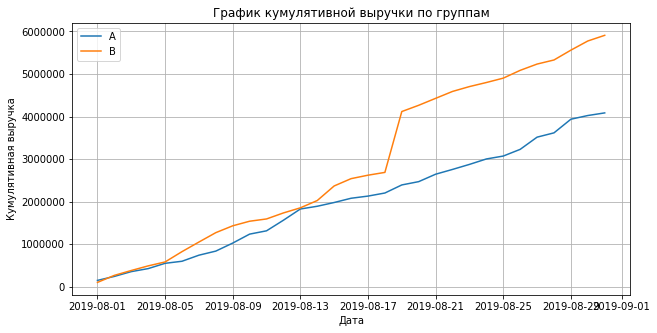

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.title('График кумулятивной выручки по группам')
plt.show()

В середине теста сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить.

<font>[к Выводу](#4.)</font>

<div class="alert alert-info">
    <h3><a name="3.2."></a> 3.2. График кумулятивного среднего чека по группам</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

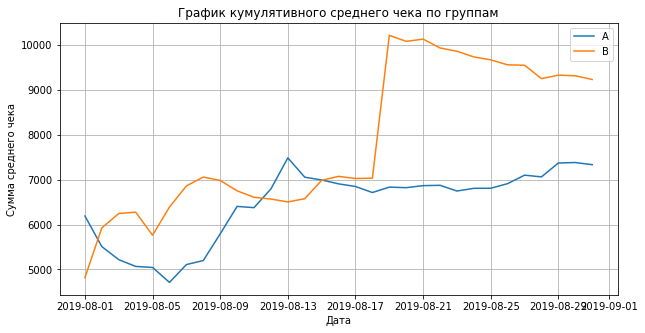

In [19]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.show()

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

<font>[к Выводу](#4.)</font>

<div class="alert alert-info">
    <h3><a name="3.3."></a> 3.3. График относительного изменения кумулятивного среднего чека группы B к группе A</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Объединим таблицы `cumulativeRevenueA` и `cumulativeRevenueB` методом `merge()`.  

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Построим график относительно различия кумулятивного среднего чека группы B к группе A

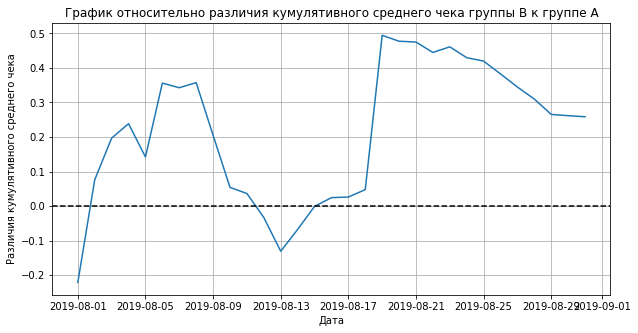

In [21]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') # добавим ось X
plt.xlabel('Дата')
plt.ylabel('Различия кумулятивного среднего чека')
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

<font>[к Выводу](#4.)</font>

<div class="alert alert-info">
    <h3><a name="3.4."></a> 3.4. График кумулятивной конверсии по группам</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Добавим в cumulativeData столбец `conversion` c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Создадим переменные `cumulativeDataA` и `cumulativeDataB`, в которых сохраним данные о заказах в сегментах A и B

In [23]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
2,2019-08-02,A,44,38,242401,1338,0.032885
4,2019-08-03,A,68,62,354874,1845,0.036856
6,2019-08-04,A,84,77,425699,2562,0.032787
8,2019-08-05,A,109,100,549917,3318,0.032851


Найдем минимальную и максимальную дату в переменных `cumulativeDataA` и `cumulativeDataB`

In [24]:
display(cumulativeDataA['date'].min(), cumulativeDataA['date'].max(), cumulativeDataB['date'].min(), cumulativeDataB['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Найдем минимальное и максимальное значение конверсии в переменных `cumulativeDataA` и `cumulativeDataB`

In [25]:
display(cumulativeDataA['conversion'].min(), cumulativeDataA['conversion'].max(), 
 cumulativeDataB['conversion'].min(), cumulativeDataB['conversion'].max())

0.029217427214536445

0.03685636856368564

0.029453015427769985

0.036323084275927994

Построим графики кумулятивной конверсии по дням и по группам

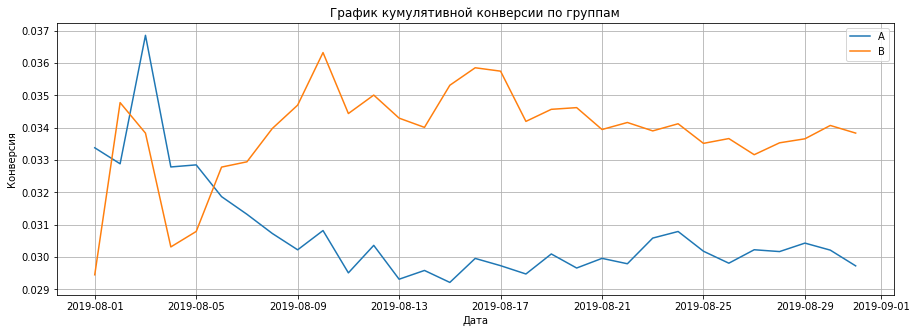

In [26]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.show()

В начале теста сегмент A имел большую конверсию, но постепенно сегмент B выровнялся и зафикировался примерно около одного значения, больше значения сегмента A. Конверсия группы A также зафиксировалась. Абсолютное значение колебания в начале и в конце теста не слишком большое: от 3% до 4%. Разница между конверсиями после фиксации незначительная, около 0,4%

<font>[к Выводу](#4.)</font>

<div class="alert alert-info">
    <h3><a name="3.5."></a> 3.5. График относительного изменения кумулятивной конверсии группы B к группе A</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Объединим таблицы `cumulativeDataA` и `cumulativeDataB` методом `merge()` так, чтобы она содержала столбцы: `['date', 'conversionA', 'conversionB']`. Сохраним в переменной `mergedCumulativeConversions`.

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Узнаем медианное значение относительного различия кумулятивной конверсии группы B к группе A

In [28]:
mergedCumulativeConversions['conversion'] = mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
mergedCumulativeConversions.sort_values(by='conversion')
mergedCumulativeConversions['conversion'].median()

0.12923832937150004

Построим график относительного различия кумулятивной конверсии группы B к группе A

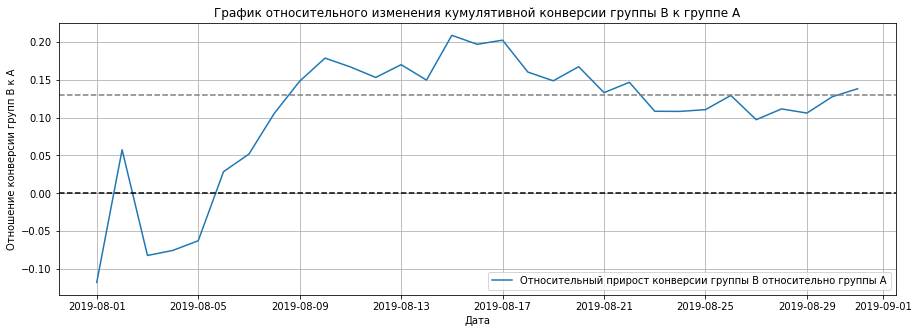

In [29]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии групп В к А')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.show()

Мы построили график относительного различия конверсии между группами. Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, либо зафиксировалась около прироста в 13% относительно группы A.  
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

<font>[к Выводу](#4.)</font>

<div class="alert alert-info">
    <h3><a name="3.6."></a> 3.6. Точечный график количества заказов по пользователям</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

In [30]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Найдите число заказов по пользователям.  
Cоздадим датафрейм c двумя столбцами: `userId` и `revenue`. Назовем его `ordersByUsers`

In [31]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
ordersByUsers.sort_values(by='orders', ascending=False).head()

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Число заказов по пользователям получили. Перейдем к визуальному анализу.

Построим гистограмму распределения числа заказов по пользователям методом `hist()`

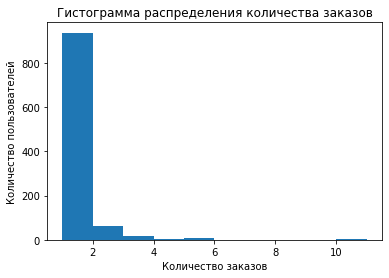

In [32]:
plt.hist(ordersByUsers['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения количества заказов')
plt.show()

Большинство пользователей совершило всего 1 заказ. Однако не ясно, сколько пользователей заказало 2, 3 и более раза. Построим график другого вида.

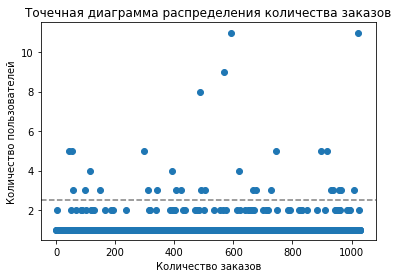

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Точечная диаграмма распределения количества заказов')
plt.axhline(y=2.5, color='grey', linestyle='--')

plt.show()

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 2 заказа — нормально или много? Ответим на этот вопрос, посчитав выборочные перцентили.

<div class="alert alert-info">
    <h3><a name="3.7."></a> 3.7. Подсчет 95-й и 99-й перцентили количества заказов на пользователя</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посчитаем 90-й, 95-й и 99-й выборочные перцентили количества заказов по пользователям методом `np.percentile()`

In [34]:
np.percentile(ordersByUsers['orders'], [90, 95, 98, 99])

array([1., 2., 3., 4.])

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше 4 заказов. Определим границу для аномальных пользователей более 3 заказов или 2% пользователей. Удалим их позже.

<div class="alert alert-info">
    <h3><a name="3.8."></a> 3.8. Точечный график стоимостей заказов</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Изучим данные о заказах

In [35]:
display(orders['revenue'].reset_index().describe(percentiles=[0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]).T[1:])

,count,mean,std,min,10%,50%,60%,70%,80%,90%,99%,max
revenue,1197.0,8348.005848,39191.131774,50.0,470.0,2978.0,4483.0,6441.8,10239.0,18168.0,58233.2,1294500.0


Суммы заказов находятся в диапазоне от 50 до 1 294 500 рублей. Если такой дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно.  
Такие аномально дорогие заказы мы удалим из теста. Можно провести и анализ самых дешёвых заказов. Однако из-за маленькой стоимости они слабо влияют на средний чек. Анализировать дешёвые заказы мы не будем.

Построим гистограмму распределения выручек `revenue` с заказов по пользователям методом `hist()`.

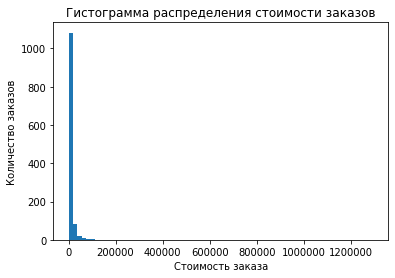

In [36]:
plt.hist(orders['revenue'], bins=70)
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов')
plt.title('Гистограмма распределения стоимости заказов')
plt.show()

Сумма большинства заказов меньше 100 000 рублей. Однако по гистограмме ничего не сказать о более дорогих, как и распределении более дешёвых. Кроме того, распределение стоимости заказов — не нормальное. Попробуем другой вид графика.

Построем диаграмму методом scatter()

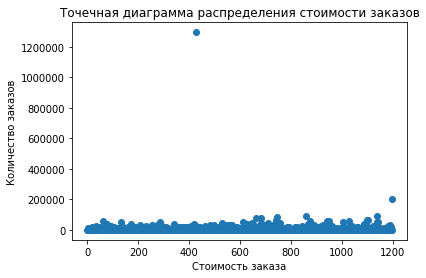

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов')
plt.title('Точечная диаграмма распределения стоимости заказов')
plt.show()

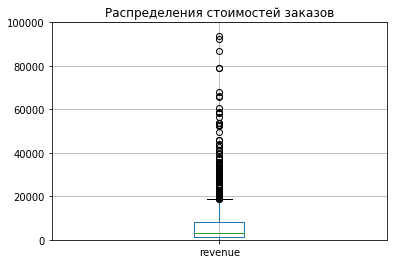

In [38]:
orders.boxplot('revenue')
plt.ylim(0, 100000)
plt.title('Распределения стоимостей заказов');

Заказов стоимостью более 100 000 рублей всего два. Есть выбросы в районе 200 000 — 1 300 000 рублей. Найдем выборочные перцентили. Заказ на 1,3 миллиона в интернет-магазине выглядит весьма аномально.

<div class="alert alert-info">
    <h3><a name="3.9."></a> 3.9. Подсчет 95-й и 99-й перцентили стоимости заказов</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посчитаем 90-й, 95-й и 99-й выборочные перцентили выручки с заказов по пользователям методом `np.percentile()`

In [39]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более, чем у 5% заказов чек дороже 28 000 рублей. И не больше, чем у 1% заказов — дороже 58 233 рублей. Выбросы довольно существенно могли повлиять на анализ.  
Выберем 28 000 рублей стоимость на одного пользователя за нижнюю границу.

<div class="alert alert-info">
    <h3><a name="3.10."></a> 3.10. Подсчет статистической значимости различий в конверсии между группами по «сырым» данным</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.

Найдем количесто визитов по дням, группы А

In [40]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Найдем количество визитов нарастающим итогом, по дням, группы А

In [41]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Найдем количесто визитов по дням, группы В

In [42]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Найдем количество визитов нарастающим итогом, по дням, группы В

In [43]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Соберем все данные в одну таблицу `data`

In [44]:
data = visitorsADaily.merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,719,713,719,713
1,2019-08-02,619,581,1338,1294
2,2019-08-03,507,509,1845,1803
3,2019-08-04,717,770,2562,2573
4,2019-08-05,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `['userId', 'orders'`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [45]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


Создадим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [46]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

Для проверки полученных данных сформулируем нулевую гипотезу: Конверсии групп А и В равны.  
Тогда альтернативная гипотеза будет звучать так: Конверсии групп А и В отличаются.

Получим конверсию в группе и выведем относительный прирост конверсии группы B

In [47]:
print("{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.0084
0.138


**Вывод**  
* Относительный прирост конверсии группы В к группе А очень хороший и составляет почти 14%(0.138).  
        
* Статистическая значимость p-value меньше 1%(0.008), а значит и меньше критического уровня статистической значимости в 5%. Следовательно, мы отвергаем нулевую гипотезу о равенстве конверсий групп А и В.  
    Значит, мы принимаем альтернативную гипотезу: **Конверсии групп А и В отличаются** 

<div class="alert alert-info">
    <h3><a name="3.11."></a> 3.11. Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Посчитаем статистическую значимость различия средних чеков между группами.

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


   * Средний чек группы В на 26%(0,259) выше среднего чека группы А.  
    Для проверки полученных данных сформулируем нулевую гипотезу: Средние чеки групп А и В равны.  
    Тогда альтернативная гипотеза будет звучать так: Средние чеки групп А и В отличаются.
    
   * Статистическая значимость p-value более 36%(0,365), что значительно больше критического уровня статистической значимости в 5%. Следовательно, мы принимаем нулевую гипотезу: **Средние чеки групп А и В равны**.
    
По-видимому на величину среднего чека группы В серьезно влияют выбросы. Поэтому надо проверить метрики конверсии и среднего чека групп по "очищенным" от выбросов данным. Приступим к анализу аномалий.  

<div class="alert alert-info">
    <h3><a name="3.12."></a> 3.12. Подсчет статистической значимости различий в конверсии между группами по «очищенным» данным</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

Примим за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 28 000 рублей. Так мы уберём 2% пользователей с наибольшим числом заказов и до 5% заказов с наибольшей стоимостью.  
Удалять будем именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.

Сделаем срезы пользователей с числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders.

In [49]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)

In [50]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

Объединим срезы в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.

In [51]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(), abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64 (63,)


Теперь у нас есть 63 аномальных пользователя. После их удаления надо считать статистическую значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста

In [52]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]\
                             ['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                                                     len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]\
                             ['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                                     len(ordersByUsersB['orders'])),name='orders')],axis=0)

Сформулируем нулевую гипотезу: Конверсии групп А и В равны.  
    Тогда альтернативная гипотеза будет звучать так: Конверсии групп А и В отличаются  


Применим статистический критерий Манна-Уитни к полученным выборкам

In [53]:
print("{0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.0090
0.148


**Вывод**  
   * Относительный прирост конверсии группы В к группе А увеличился на 1% по сравнению с "сырыми" данными и составляет почти 15%(0.148).  
    
   * Результаты по конверсии практически не изменились (0,009). Статистическая значимость p-value меньше 1%, а значит и меньше критического уровня статистической значимости в 5%.  
    Следовательно, мы отвергаем нулевую гипотезу о равенстве конверсий групп А и В.  
    Значит, мы принимаем альтернативную гипотезу: **Конверсии групп А и В отличаются**  
    


<div class="alert alert-info">
    <h3><a name="3.13."></a> 3.13. Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

In [54]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.488
-0.017


**Вывод**  
* Получили совсем другую величину. В «сырых» данных средний чек группы В на 26% превышал средний чек группы А. В «очищенных» данных средний чек группы В уже меньше среднего чека группы А на 2%(-0,017), то есть почти не отличается от него.  
    Для проверки полученных данных сформулируем нулевую гипотезу: Средние чеки групп А и В равны.  
    Тогда альтернативная гипотеза будет звучать так: Средние чеки групп А и В отличаются.
    
* Результаты по среднему чеку увеличились. Статистическая значимость p-value 49%(0,488), что значительно больше критического уровня статистической значимости в 5%.  
    Следовательно, мы принимаем нулевую гипотезу: **Средние чеки групп А и В равны**.  
    После удаления выбросов из тестируемых групп, результат проверки различий средних чеков групп на статистическую значимость очевиден. В результате проведенного А/В-теста средний чек в группе В не отличается от среднего чека группы А

<div class="alert alert-info">
    <h3><a name="3.14."></a> 3.14. Применение решения по результатам теста и объяснение его</h3>
</div>

<font>[к Оглавлению](#0.0)</font>

* Мы обнаружили статистически значимое различие по конверсии между группами, как по "сырым", так и по "очищенным" данным. Конверсия группы В превышает конверсию группы А на 15%.  
* Мы обнаружили отсутствие статистически значимого различия по среднему чеку заказа между группами А и В. Особенно очевидным стало равенство средних чеков после фильтрации выбросов. Группа В обладает схожим средним чеком заказа со средним чеком группы А, но за счет более высокой конверсии посетителей в покупатели, приносит больше прибыли интернет-магазину. 
* Судя по графику различия конверсии между группами можно сделать вывод, что результаты группы В лучше группы А: к концу теста превышение конверсии группы В над группой А стабилизировалось на уровне 10-15%.



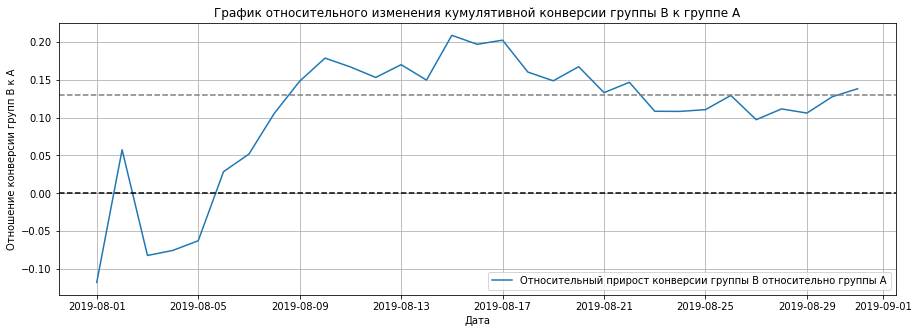

In [55]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии групп В к А')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--')
plt.show()

* График различия среднего чека сильно колеблется из-за выбросов и сделать определенные выводы по нему нельзя. Он показывает превышение среднего чека группы В над средним чеком группы А на 25-30%. Однако, как показал метод Манна-Уитни, этот показатель вызван выбросами и не соответствует реальным значениям.

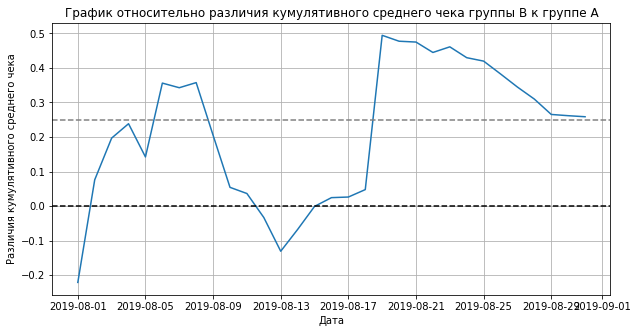

In [56]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') # добавим ось X
plt.axhline(y=0.25, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Различия кумулятивного среднего чека')
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.show()

* Пользователей, заказавших более трех раз, совсем мало. Они вполне могут быть аномальными. 3 заказа — нормально или много? На этот вопрос мы ответили, посчитав выборочные перцентили. Получается что пользователей совершивших более 3 заказов 2%, а это немного.

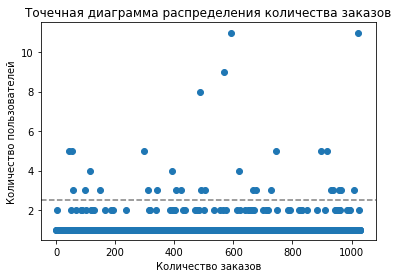

In [57]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title('Точечная диаграмма распределения количества заказов')
plt.axhline(y=2.5, color='grey', linestyle='--')

plt.show()

* Заказов стоимостью более 100 000 рублей всего два. Есть выбросы в районе 200 000 — 1 300 000 рублей. Заказ на 1,3 миллиона в интернет-магазине выглядит весьма аномально. Посчитав перцентели мы поняли, что границу стоимости заказов можно установить на 28 000 рублей. Остальное считать выбросами.

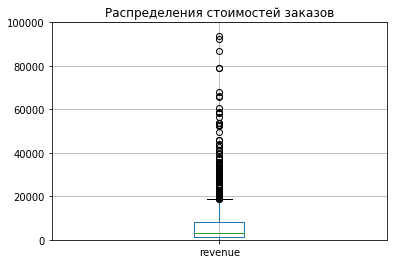

In [58]:
orders.boxplot('revenue')
plt.ylim(0, 100000)
plt.title('Распределения стоимостей заказов');

### Исходя из обнаруженных фактов можно: 
* А/В-тест **признать успешным**
* победитель - **группа В**
- тест можно **остановить**

<div class="alert alert-info">
    <h2><a name="4."></a>4. Вывод</h2>
</div>

<font>[к Оглавлению](#0.0)</font>

На изучении у нас было 9 гипотез, как увеличить выручку интернет-магазина. В качестве методов упорядочивания экспериментов были выбраны способы ICE и RICE. Наиболее перспективные гипотезы по ICE: 8, 0, 7 и 6. Первое место - за 8-й гипотезой: **Запустить акцию, дающую скидку на товар в день рождения.**

Наиболее перспективные гипотезы по RICE: 7, 2, 0 и 6. На первое место поднялась гипотеза под номером 7: **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.** Это объясняется тем, что ее параметр Reach максимален и равен 10, в то время как у других гипотез он меньше. Раз охват 7 гипотезы максимален, гипотезе был установлен высший приоритет и проведено ее А/В-тестирование с целью выяснить, увеличится ли с ее помощью выручка интернет-магазина.

<font>[График кумулятивной выручки по группам](#3.1.)</font> **А** и группы **В** показал, что выручка в обеих группах с течением времени растет. Выручка группы **А** увеличивается плавно, равномерно. Выручка группы **В** расчет сильнее, но неравномерно. В группе **В** был зафиксирован резкий скачек выручки вверх. Это могло быть следствием всплеска числа заказов в интернет-магазине, либо появлением очень дорогих заказов.   

<font>[График кумулятивного среднего чека по группам](#3.2.)</font> показал, что у группы **В** наблюдался тот же резкий всплеск среднего чека, что и всплеск выручки. После этого средний чек группы **В** постепенно снижался, а средний чек группы **А** наоборот - рос. По графику сложно сказать, что средние чеки по группам установились вокруг своих окончательных значений.

<font>[График относительного изменения кумулятивного среднего чека групп](#3.3.)</font> показал сильные колебания среднего чека в течение всего эксперимента. Скорее всего это влияние выбросов - крупных заказов покупателей интернет-магазина то в одной группе, то в другой.

<font>[График кумулятивной конверсии по группам](#3.4.)</font> показал, что с течением времени конверсия группы **В** установилась около 3,4% и зафиксировалась, а конверсия группы **А** установилась около 3% и зафиксировалась. Разница между конверсиями незначительная и составляет 0.4% в пользу группы **В**.

<font>[График относительного изменения кумулятивной конверсии групп](#3.5.)</font> подтвердил превосходство группы **В**. К концу августа превышение конверсии группы **В** над группой **А** стабилизировалось на уровне 10-15%.

Не более 1% пользователей заказывали более 4-х раз. И не более 5% пользователей сделали два заказа в месяц. Граница для определения аномальных пользователей - три заказа.  

Не более 1% заказов стоят дороже 58 233 рублей. И не более 5% заказов дороже 28 000 рублей. Граница для определения аномальных заказов - в размере 28 000 рублей.

1. Подсчет статистической значимости различий **в конверсии между группами по «сырым»** данным показал очень хороший относительный прирост конверсии группы В к группе А и составлил почти 14%(0.138).  
Статистическая значимость p-value меньше 1%(0.008), а значит мы принимаем альтернативную гипотезу: **Конверсии групп А и В отличаются**


2. Подсчет статистической значимости различий **в конверсии между группами по «очищенным»** данным показал увеличение конверсии на 1% по сравнению с "сырыми" данными и составил почти 15%(0.148).  
Результаты по конверсии практически не изменились (0,009). Статистическая значимость p-value меньше 1%, а значит мы принимаем альтернативную гипотезу: **Конверсии групп А и В отличаются**  


3. Подсчет статистической значимости различий **в среднем чеке** заказа между группами по **«сырым»** данным показал, что Средний чек группы В на 26%(0,259) выше среднего чека группы А.       
Статистическая значимость p-value более 36%(0,365), что значительно больше критического уровня статистической значимости в 5%. Мы принимаем нулевую гипотезу: **Средние чеки групп А и В равны**.
    
    
4. Подсчет статистической значимости различий **в среднем чеке** заказа между группами по **«очищенным»** данным оказал, что мы получили совсем другую величину. В «сырых» данных средний чек группы В на 26% превышал средний чек группы А. В «очищенных» данных средний чек группы В уже меньше среднего чека группы А на 2%(-0,017), то есть почти не отличается от него.  
Результаты по среднему чеку увеличились. Статистическая значимость p-value 49%(0,488), что значительно больше критического уровня статистической значимости в 5% и мы принимаем нулевую гипотезу: **Средние чеки групп А и В равны**.  
    После удаления выбросов из тестируемых групп, результат проверки различий средних чеков групп на статистическую значимость очевиден. В результате проведенного А/В-теста средний чек в группе В не отличается от среднего чека группы А